In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow

import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
%%time
with tf.device("/gpu:0"):
    model.fit(x_train, y_train, epochs=5)

    model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2955 - acc: 0.9138
Epoch 2/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1412 - acc: 0.9574
Epoch 3/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1064 - acc: 0.9679
Epoch 4/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0879 - acc: 0.9729
Epoch 5/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0748 - acc: 0.9766
 - 0s - loss: 0.0692 - acc: 0.9788
Wall time: 20 s


In [5]:
# CUDA_VISIBLE_DEVICES=""
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

# No GPU found

GPU found


In [6]:
from tensorflow.python.client import device_lib
local_device_protos = device_lib.list_local_devices()
print([x.name for x in local_device_protos if x.device_type == 'GPU'])
print([x.name for x in local_device_protos if x.device_type == 'CPU'])

['/device:GPU:0']
['/device:CPU:0']


In [7]:
config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )
sess = tf.Session(config=config)

In [8]:
model.save('model.h5')

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [10]:
img = (255 - cv2.imread('i3.png', 0)) / 255

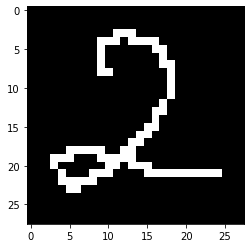

In [11]:
plt.imshow(img, cmap='gray')

In [12]:
imgs = np.array([img])

In [13]:
result = model.predict(imgs)

In [14]:
for i, k in enumerate(result[0]):
    print(f'{i}: {k:.10f}')

0: 0.0000000000
1: 0.0000720296
2: 0.9999268055
3: 0.0000011034
4: 0.0000000000
5: 0.0000001068
6: 0.0000000000
7: 0.0000000001
8: 0.0000000006
9: 0.0000000000
